In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
df = pd.read_csv("DatasetML_V1.csv")
df = df.drop("Unnamed: 0", axis = 1 )

ANALICEMOS A PARTIR DE AQUI A LAS VARIABLES DISPONIBLES EN EL SIGUIENTE ORDEN.
1.- COMPROTAMIENTO Y CARACTERISTICAS DE LA VARIABLE OBJETIVO O EXPLICADA "PRECIO"
2.- COMPORTAMIENTO Y CARACTERISTICAS DE LAS VARIABLES EXPLICADORAS. EN EL SIGUIENTE ORDEN DE RELEVANCIA (A PRIORI):
    2.1.- GENERO ("genres)
    2.2.- ESPECIFICACIONES ("specs")
    2.3.- SENTIMIENTO ("sentiment")
    2.4.- PUBLICADOR ("publisher")
    2.5.- ACCESO TEMPRANO O SALIDA TEMPRANA ("early_access")
    2.6.- AÑO ("año")

ANALISIS SOBRE VARIABLE OBJETIVO O EXPLICADA.
1.- ANALISIS DE OUTLIERS
2.- DISTRIBUCION DE FRECUENCIA.
3.- ESTADISTICOS BASICOS. MEDIA, MEDIANA, DESVIACION ESTANDAR.

In [5]:
df.head(2)

,publisher,genres,specs,early_access,sentiment,año,precio_1
0,Trickjump Games Ltd,Action,Single-player,False,Mixed,2018,3.99
1,Trickjump Games Ltd,Action,Steam Achievements,False,Mixed,2018,3.99


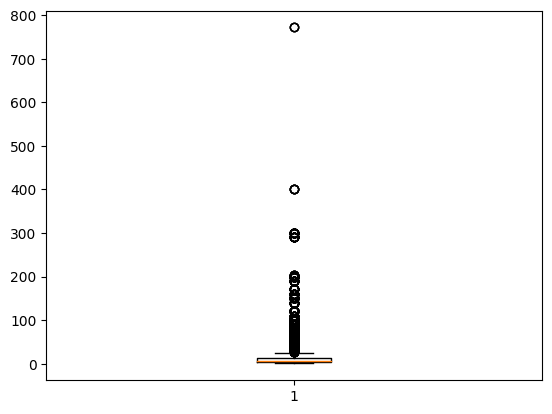

In [3]:
fig, ax = plt.subplots()
ax.boxplot(x = "precio_1", data = df)

plt.show()

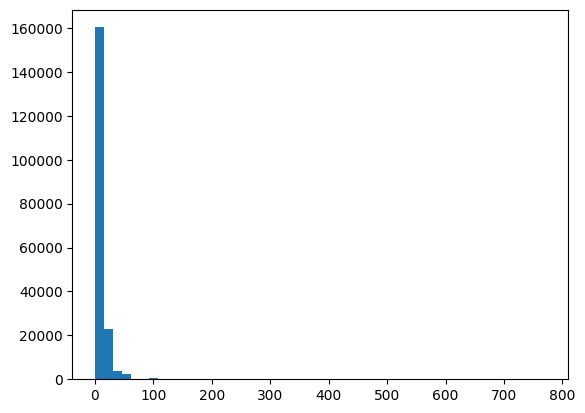

In [4]:
fig, ax = plt.subplots()
ax.hist(x = "precio_1", data = df, bins = 50)

plt.show()


In [8]:
print("Promedio: ",round(df["precio_1"].mean(),2))
print("desviacion: ",round(df["precio_1"].std(),2))
print("Cuartil 20%: ",np.percentile(df["precio_1"], 20))
print("Cuartil 40%: ",np.percentile(df["precio_1"], 40))
print("Mediana: ",np.percentile(df["precio_1"], 50))
print("Cuartil 60%: ",np.percentile(df["precio_1"], 60))
print("Cuartil 80%: ",np.percentile(df["precio_1"], 80))

Promedio:  10.55
desviacion:  13.44
Cuartil 20%:  2.99
Cuartil 40%:  4.99
Mediana:  6.99
Cuartil 60%:  9.99
Cuartil 80%:  14.99


EL COMPORTAMIENTO DEL PRECIO ES EXTREMADAMENTE SESGADO, SIN EMBARGO SE PUEDE VER QUE EL 80% DE LOS DATOS SE MUEVEN EN UN RANGO DE ENTRE 0 Y 15 CON UNA MEDIANA DE 7, ES DECIR, ES CLARO QUE EXISTE UN CONJUNTO DE DATOS MINORITARIO QUE ALEJA DE MANEA ABRUPTA AL PROMEDIO Y ABRE UNA DISPERSION IMPORTANTE. EN TAL SENTIDO LO QUE HAREMOS A CONTINUACION ES INTENTAR VALIDAR LA POSIBLE EXISTENCIA DE UN CONJUNTO DE DATOS QUE PERMITA IDENTIFICAR UN COMPORTAMIENTO NORMAL CON UNA DISPERSION DE HASTA 5%.

In [3]:
maximo = df["precio_1"].max()
desv = round(df[df["precio_1"] <= maximo]["precio_1"].std(),2)
parada = True
while parada:    
    if desv <= 5.0:
        var = maximo
        parada = False
    else:
        desv = round(df[df["precio_1"] <= maximo]["precio_1"].std(),5)
        maximo *= (1-0.001)
        parada = True

In [4]:
Pob_efectivo = df[df["precio_1"] <= maximo]["precio_1"].count()
Pob_outlier = df[df["precio_1"] > maximo]["precio_1"].count()
Porc_efectivo = Pob_efectivo / (Pob_efectivo + Pob_outlier)
Porc_outlier = Pob_outlier / (Pob_efectivo + Pob_outlier)
print("Poblacion efectiva: ",round(Porc_efectivo,2))
print("Precio de inflexion: ",round(maximo,2))
print("Desviacion Standar: ",round(desv,2))

Poblacion efectiva:  0.85
Precio de inflexion:  19.96
Desviacion Standar:  4.37


In [5]:
df_efectivo = df[df["precio_1"] <= maximo]
df_outlier = df[df["precio_1"] > maximo]

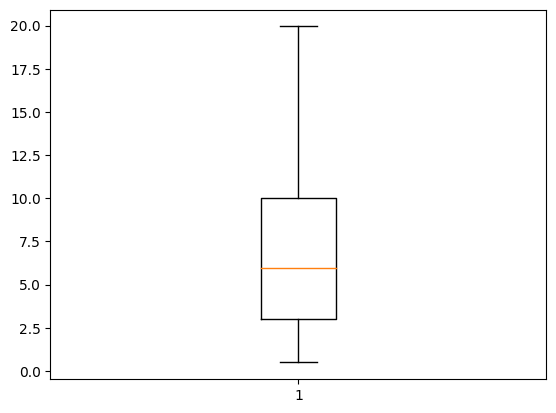

In [10]:
fig, ax = plt.subplots()
ax.boxplot(x = "precio_1", data = df_efectivo)

plt.show()

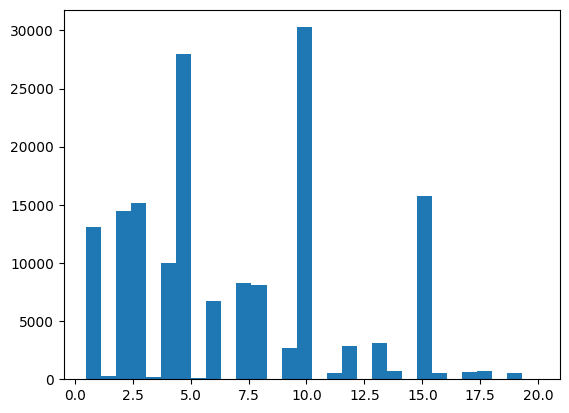

In [11]:
fig, ax = plt.subplots()
ax.hist(x = "precio_1", data = df_efectivo, bins = 30)

plt.show()

In [6]:
df_precios_efectivo = pd.DataFrame({'valor': df_efectivo["precio_1"].unique(), 'cantidad': df_efectivo["precio_1"].value_counts()}).sort_values('cantidad', ascending = 0)
df_precios_efectivo["prob"] = round(df_precios_efectivo["cantidad"] / df_precios_efectivo["cantidad"].sum(),2)

df_precios_outlier = pd.DataFrame({'valor': df_outlier["precio_1"].unique(), 'cantidad': df_outlier["precio_1"].value_counts()}).sort_values('cantidad', ascending = 0)
df_precios_outlier["prob"] = round(df_precios_outlier["cantidad"] / df_precios_outlier["cantidad"].sum(),2)

In [7]:
df_precios_efectivo.head(5)

,valor,cantidad,prob
precio_1,,,
9.99,3.99,30191,0.19
4.99,1.59,27844,0.17
14.99,0.99,15665,0.10
2.99,9.99,14534,0.09
1.99,6.99,14453,0.09


In [8]:
df_precios_outlier.head(5)

,valor,cantidad,prob
precio_1,,,
19.99,39.99,13285,0.48
29.99,19.99,3884,0.14
24.99,29.99,2953,0.11
39.99,24.99,2384,0.09
49.99,61.99,1334,0.05


In [9]:
print("Valeres diferentes dentro en el precio: ",len(df["precio_1"].unique()))
print("Valeres diferentes dentro del rango outlier en el precio: ",len(df[df["precio_1"] > maximo]["precio_1"].unique()))
print("Porcentaje de valores implicitos en la poblacion outliers: ",round((len(df[df["precio_1"] > maximo]["precio_1"].unique())/len(df["precio_1"].unique())),2))

Valeres diferentes dentro en el precio:  117
Valeres diferentes dentro del rango outlier en el precio:  53
Porcentaje de valores implicitos en la poblacion outliers:  0.45


In [10]:
print("Promedio: ",round(df_efectivo["precio_1"].mean(),2))
print("desviacion: ",round(df_efectivo["precio_1"].std(),2))
print("Cuartil 20%: ",np.percentile(df_efectivo["precio_1"], 20))
print("Cuartil 40%: ",np.percentile(df_efectivo["precio_1"], 40))
print("Mediana: ",np.percentile(df_efectivo["precio_1"], 50))
print("Cuartil 60%: ",np.percentile(df_efectivo["precio_1"], 60))
print("Cuartil 80%: ",np.percentile(df_efectivo["precio_1"], 80))

Promedio:  6.93
desviacion:  4.36
Cuartil 20%:  2.99
Cuartil 40%:  4.99
Mediana:  5.99
Cuartil 60%:  7.99
Cuartil 80%:  9.99


CONCLUSION:

LA VARIABLE OBJETIVO TIENE UN COMPORTAMIENTO ALTAMENTE SESGADO (15 % DE LOS DATOS EXCEDE LELVA SU DISPERCION DE 4,4% A MAS DE 13%). AL MISMO TIEMPO el 46% DE LOS DIFERENTES PRECIOS CAEN EN DICHA POBLACION "OUTLIER".

ESTO QUIERE DECIR, QUE LA GRAN MAYORIA DE VALORES COMUNES (CONJUNTO DE VALORES EFECTIVOS) EN LA VARIABLE PRECIO ES UN CONJUNTO DE MENOR CANTIDAD QUE EL CONJUNTO DE VALORES QUE CAEN EN LA POBLACION OUTLIER. ES DECIR, ESTE CONJUNTO DE VALORES EN LA POBLACION OUTLIER ES ALTAMENTE DISPERSO. 

ESTO DE ANTEMANO NOS PERMITE DEDUCIR ALGUNAS CARACTERISTICAS DEL PRECIO:

1.- EL PRECIO TIENE UN COMPORTAMIENTO NORMAL HASTA APROX 20 DOLARES. ESTO OCURRE EN EL 85% DE LOS DATOS.
2.- DESPUES DE LOS 20$ LOS VALORES POTENCIALES DEL PRECIO VARIAN ENTRE 20 Y 800 DOLARES. ESTO OCURRE EN EL 85% DE LOS DATOS.

EL RETO EN LOS PROXIMOS ANALISIS SERA IDENTIFICAR LAS VARIABLES INDEPENDIENTES QUE EXPLICAN EL COMPORTAMIENTO DISPERSE DE LA VARIABLE PRECIO A PARTIR DE LOS 20$.

2.1.- GENERO ("genres). PASOS A SEGUIR.
    2.1.1.- DEFINIR UNA ESCALA, PUES ESTA VARIABLE ES DE TIPO CATEGORICA.
    2.1.2.- NORMALIZAR LA ESCALA.
    2.1.3.- COMPARAR LA VARIABLE CON LA VARIABLE OBJETIVO MEDIANTE UN DIAGRAMA DE DISPERSION.

In [70]:
#Procedimiento para llenar una lista de tuplas, donde en cada tupla se guarda el valor de campo y el orden de relevancia, el cualse utilizara como escala.
#var = df['genres'].value_counts().sort_values(ascending=True)
#generos_lista = var.index.to_list()
#lista_tuplas = []
#for i,valor in enumerate(generos_lista):
#    lista_tuplas.append((generos_lista[i],i))
#lista_tuplas

var_gen = df['genres'].value_counts().sort_values(ascending=False)
total = var_gen.sum()
total
lista_tuplas = []
for i,valor in enumerate(var_gen):
    lista_tuplas.append((var_gen.index[i],round(var_gen[i] / total,2)))
lista_tuplas


[('Indie', 0.23),
 ('Action', 0.2),
 ('Adventure', 0.12),
 ('Strategy', 0.1),
 ('Casual', 0.09),
 ('Simulation', 0.08),
 ('RPG', 0.07),
 ('Early Access', 0.02),
 ('Sports', 0.02),
 ('Racing', 0.02),
 ('Massively Multiplayer', 0.02),
 ('Free to Play', 0.02),
 ('Design &amp; Illustration', 0.0),
 ('Web Publishing', 0.0),
 ('Utilities', 0.0),
 ('Animation &amp; Modeling', 0.0),
 ('Education', 0.0),
 ('Software Training', 0.0),
 ('Video Production', 0.0),
 ('Audio Production', 0.0),
 ('Photo Editing', 0.0)]

In [71]:
def asig_genres(cadena,lista):
    var = 0
    for i in range(0,len(lista)):
        if lista[i][0] == cadena:
            var = lista[i][1]
        
    return var

In [72]:
df["escala_genres"] = df["genres"].apply(lambda x: asig_genres(x,lista_tuplas) if True else x)

In [73]:
df.head()

,publisher,genres,specs,early_access,sentiment,año,precio_1,escala_genres
0,Trickjump Games Ltd,Action,Single-player,False,Mixed,2018,3.99,0.20
1,Trickjump Games Ltd,Action,Steam Achievements,False,Mixed,2018,3.99,0.20
2,Trickjump Games Ltd,Adventure,Single-player,False,Mixed,2018,3.99,0.12
3,Trickjump Games Ltd,Adventure,Steam Achievements,False,Mixed,2018,3.99,0.12
4,Trickjump Games Ltd,Simulation,Single-player,False,Mixed,2018,3.99,0.08


2.2.- ESPECIFICACIONES ("specs")

In [74]:
#Procedimiento para llenar una lista de tuplas, donde en cada tupla se guarda el valor de campo y el orden de relevancia, el cualse utilizara como escala.
#var = df['specs'].value_counts().sort_values(ascending=True)
#specs_lista = var.index.to_list()
#lista_tuplas = []
#for i,valor in enumerate(specs_lista):
#    lista_tuplas.append((specs_lista[i],i))
#lista_tuplas

var_spec = df['specs'].value_counts().sort_values(ascending=False)
total = var_spec.sum()
total
lista_tuplas = []
for i,valor in enumerate(var_spec):
    lista_tuplas.append((var_spec.index[i],round(var_spec[i] / total,2)))
lista_tuplas

[('Single-player', 0.21),
 ('Steam Achievements', 0.14),
 ('Steam Trading Cards', 0.11),
 ('Steam Cloud', 0.08),
 ('Full controller support', 0.06),
 ('Multi-player', 0.06),
 ('Downloadable Content', 0.05),
 ('Partial Controller Support', 0.05),
 ('Steam Leaderboards', 0.04),
 ('Co-op', 0.03),
 ('Shared/Split Screen', 0.03),
 ('Stats', 0.02),
 ('Online Multi-Player', 0.02),
 ('Cross-Platform Multiplayer', 0.02),
 ('Steam Workshop', 0.02),
 ('Includes level editor', 0.01),
 ('Local Multi-Player', 0.01),
 ('Online Co-op', 0.01),
 ('MMO', 0.01),
 ('Captions available', 0.01),
 ('Local Co-op', 0.01),
 ('In-App Purchases', 0.01),
 ('Valve Anti-Cheat enabled', 0.0),
 ('Commentary available', 0.0),
 ('Steam Turn Notifications', 0.0),
 ('Includes Source SDK', 0.0),
 ('SteamVR Collectibles', 0.0),
 ('Game demo', 0.0)]

In [75]:
df["escala_specs"] = df["specs"].apply(lambda x: asig_genres(x,lista_tuplas) if True else x)

In [76]:
df.head()

,publisher,genres,specs,early_access,sentiment,año,precio_1,escala_genres,escala_specs
0,Trickjump Games Ltd,Action,Single-player,False,Mixed,2018,3.99,0.20,0.21
1,Trickjump Games Ltd,Action,Steam Achievements,False,Mixed,2018,3.99,0.20,0.14
2,Trickjump Games Ltd,Adventure,Single-player,False,Mixed,2018,3.99,0.12,0.21
3,Trickjump Games Ltd,Adventure,Steam Achievements,False,Mixed,2018,3.99,0.12,0.14
4,Trickjump Games Ltd,Simulation,Single-player,False,Mixed,2018,3.99,0.08,0.21


    2.3.- SENTIMIENTO ("sentiment")

In [77]:
#Procedimiento para llenar una lista de tuplas, donde en cada tupla se guarda el valor de campo y el orden de relevancia, el cualse utilizara como escala.
#var = df['sentiment'].value_counts().sort_values(ascending=True)
#sentiment_lista = var.index.to_list()
#lista_tuplas = []
#for i,valor in enumerate(sentiment_lista):
#    lista_tuplas.append((sentiment_lista[i],i))
#lista_tuplas

var_sent = df['sentiment'].value_counts().sort_values(ascending=False)
total = var_sent.sum()
total
lista_tuplas = []
for i,valor in enumerate(var_sent):
    lista_tuplas.append((var_sent.index[i],round(var_sent[i] / total,2)))
lista_tuplas

[('Very Positive', 0.18),
 ('Mixed', 0.16),
 ('Mostly Positive', 0.13),
 ('Positive', 0.12),
 ('1 user reviews', 0.07),
 ('2 user reviews', 0.06),
 ('3 user reviews', 0.05),
 ('4 user reviews', 0.04),
 ('5 user reviews', 0.03),
 ('Mostly Negative', 0.03),
 ('6 user reviews', 0.03),
 ('7 user reviews', 0.03),
 ('8 user reviews', 0.02),
 ('9 user reviews', 0.02),
 ('Overwhelmingly Positive', 0.02),
 ('Negative', 0.0),
 ('Very Negative', 0.0),
 ('Overwhelmingly Negative', 0.0)]

In [78]:
df["escala_sentiment"] = df["sentiment"].apply(lambda x: asig_genres(x,lista_tuplas) if True else x)

In [79]:
df.head()

,publisher,genres,specs,early_access,sentiment,año,precio_1,escala_genres,escala_specs,escala_sentiment
0,Trickjump Games Ltd,Action,Single-player,False,Mixed,2018,3.99,0.20,0.21,0.16
1,Trickjump Games Ltd,Action,Steam Achievements,False,Mixed,2018,3.99,0.20,0.14,0.16
2,Trickjump Games Ltd,Adventure,Single-player,False,Mixed,2018,3.99,0.12,0.21,0.16
3,Trickjump Games Ltd,Adventure,Steam Achievements,False,Mixed,2018,3.99,0.12,0.14,0.16
4,Trickjump Games Ltd,Simulation,Single-player,False,Mixed,2018,3.99,0.08,0.21,0.16


2.4.- PUBLICADOR ("publisher")

In [24]:
#Procedimiento para llenar una lista de tuplas, donde en cada tupla se guarda el valor de campo y el orden de relevancia, el cualse utilizara como escala.
var = df['publisher'].value_counts().sort_values(ascending=True)
publisher_lista = var.index.to_list()
lista_tuplas = []
for i,valor in enumerate(publisher_lista):
    lista_tuplas.append((publisher_lista[i],i))
lista_tuplas

[('Pig Ignorant Entertainment', 0),
 ('Konami Digital Entertainment, Inc., Konami Digital Entertainement GmbH', 1),
 ('Bloom Digital Media', 2),
 ('Serzhantov Aleksandr', 3),
 ('InterSol OOO', 4),
 ('Candella Systems Ltd', 5),
 ('Zero Degrees Games', 6),
 ('Pilgway', 7),
 ('GAMES in FLAMES', 8),
 ('Richard Haraším', 9),
 ('Dmitry', 10),
 ('Eglathia Games', 11),
 ('Titouan Millet', 12),
 ('Games for All', 13),
 ('Coin Operated Games, Work Shift Play Inc.', 14),
 ('AtGames', 15),
 ('Big Fun Games', 16),
 ('1C Company, Playrix', 17),
 ('Automata Source, Potassium Frog', 18),
 ("Xivek's Toybox", 19),
 ('Thomas Gwaltney', 20),
 ('WaveDNA', 21),
 ('Scrap Yard Productions, LLC', 22),
 ('Koch Media , CyberLink', 23),
 ('Duang! Games, LLC', 24),
 ('ALLPlayer Group Ltd.', 25),
 ('ThinkVirtual', 26),
 ('yang1zhi', 27),
 ('Girls Make Games, LearnDistrict, Inc.', 28),
 ('LB', 29),
 ('Arkane Studios', 30),
 ('ND Games, bitComposer Games', 31),
 ('HuBiao', 32),
 ('Desktop Gaming', 33),
 ('Lemon Jam S

In [25]:
len(lista_tuplas)

6835

SE DESECHA LA POSIBILIDAD DE UTILIZAR EL FEATURE PUBLICADOR ("publisher"), PUES ADEMAS DE APORTAR POCO SENTIDO AL COMPORTAMIENTO DEL PRECIO, TIENE DEMASIADOS VALORES CATEGORICOS IMPLICITOS Y POR TANTO SE DISPERSA DEMASIADO EL PESO O RELEVANCIA EXPLICATIVA SOBRE LA VARIABLE OBJETIVO.

2.5.- ACCESO TEMPRANO O SALIDA TEMPRANA ("early_access")


In [80]:
def asig_early(cadena):
    if cadena == True:
        return 1
    else:
        return 0


In [81]:
df["escala_early"] = df["early_access"].apply(lambda x:asig_early(x) if True else 0)

In [82]:
df[df["escala_early"] == 1].head()

,publisher,genres,specs,early_access,sentiment,año,precio_1,escala_genres,escala_specs,escala_sentiment,escala_early
77,Wonderbox Games,Casual,Single-player,True,Mixed,2017,9.99,0.09,0.21,0.16,1
78,Wonderbox Games,Casual,Steam Achievements,True,Mixed,2017,9.99,0.09,0.14,0.16,1
79,Wonderbox Games,Strategy,Single-player,True,Mixed,2017,9.99,0.10,0.21,0.16,1
80,Wonderbox Games,Strategy,Steam Achievements,True,Mixed,2017,9.99,0.10,0.14,0.16,1
81,Wonderbox Games,Early Access,Single-player,True,Mixed,2017,9.99,0.02,0.21,0.16,1


HAGAMOS LAS COMPARACIONES DE CADA VARIABLE EXPLICADORA CONTRA LA VARIABLE EXPLICADA.

GENERO VS PRECIO

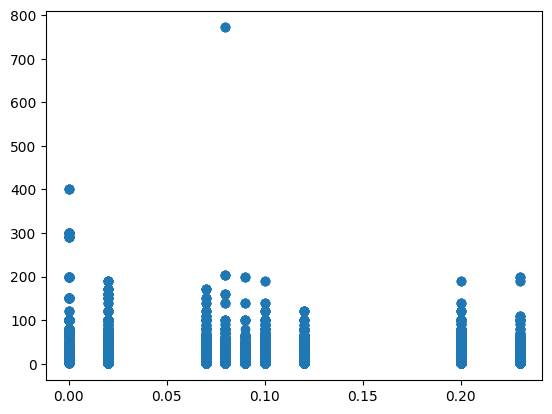

In [83]:
x = df["escala_genres"].values
y = df["precio_1"].values
plt.scatter(x, y)
plt.show()

In [84]:
df[['escala_genres', 'precio_1']].corr()

,escala_genres,precio_1
escala_genres,1.00000,-0.16064
precio_1,-0.16064,1.00000


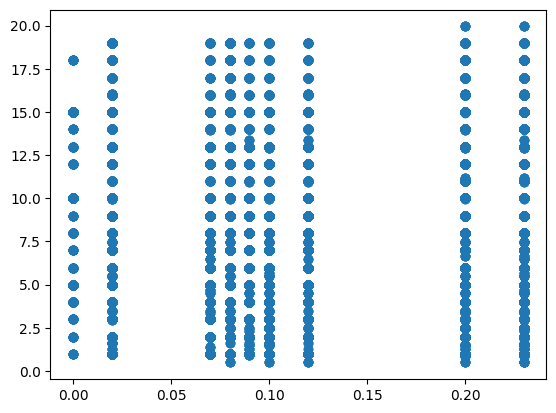

In [85]:
x = df[df["precio_1"] <= maximo]["escala_genres"].values
y = df[df["precio_1"] <= maximo]["precio_1"].values
plt.scatter(x, y)
plt.show()

In [86]:
df[df["precio_1"] <= maximo][['escala_genres', 'precio_1']].corr()

,escala_genres,precio_1
escala_genres,1.000000,-0.064431
precio_1,-0.064431,1.000000


CONCLUSIONES PREVIAS (GENERO).

EN LA VARIABLE GENERO, EL CONJUNTO DE SUS VALORES SE COMPORTA APROXIMADAMENTE EN MODO UNIFORME, ES DECIR, DESDE EL PUNTO DE VISTA DE CORRELACION, ESTA TIENDE A SER ALTA EN LA MEDIDA QUE PRESCINDIMOS DEL RANGO ATIPICO EN EL PRECIO, PERO AUN ASI, EN GENERAL, LA EXPLICACION QUE A PRIORI PODEMOS PRESUMIR DEL GENERO HACIA EL PRECIO, ES QUE CUALQUIER GENERO ES PROPENSO A CUALQUIER PRECIO. VISUALMENTE Y SEGURAMENTE TAMBIEN DESDE EL PUNTO DE VISTA ANALITICO HAY UNA LEVE TENDENCIA DE ALZA EN EL PRECIO EN LOS GENEROS MAS COMUNES O MAS CONSUMIDOS. ESA ES LA INFORMACION IMPORTANTE QUE ESTE ATRIBUTO PUEDE APORTAR AL MODELO DE PREDICCION. PERO TENGASE EN CUENTA QUE DICHO SESGO "GENEROS MAS CONSUMIDOS TIENDE A MAYOR PRECIO", NO ES RELEVANTE, ES UNA TENDEDENCIA MUY SUAVE.

ESPECIFICACIONES VS PRECIO

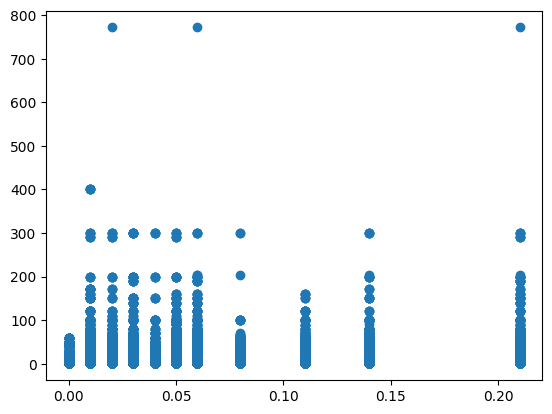

In [87]:
x = df["escala_specs"].values
y = df["precio_1"].values
plt.scatter(x, y)
plt.show()

In [88]:
df[['escala_specs', 'precio_1']].corr()

,escala_specs,precio_1
escala_specs,1.000000,-0.088495
precio_1,-0.088495,1.000000


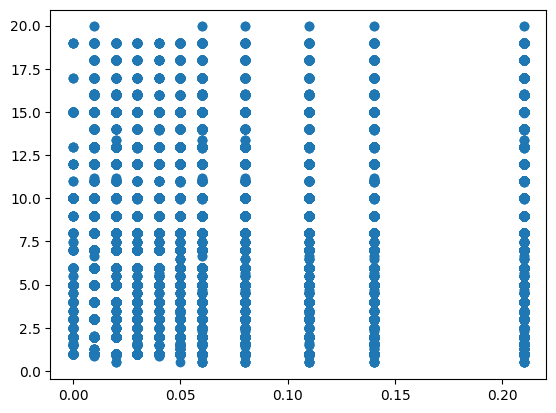

In [89]:
x = df[df["precio_1"] <= maximo]["escala_specs"].values
y = df[df["precio_1"] <= maximo]["precio_1"].values
plt.scatter(x, y)
plt.show()

In [90]:
df[df["precio_1"] <= maximo][['escala_specs', 'precio_1']].corr()

,escala_specs,precio_1
escala_specs,1.000000,-0.063038
precio_1,-0.063038,1.000000


CONCLUSIONES PREVIAS (ESPECIFICACIONES).

DE MANERA INTERESANTE, EL ARTIBUTO ESPECIFICACIONES APORTA MEJOR CALIDAD DE INFORMACION AL MODELO, DESDE EL PUNDO DE VISTA DE TU TENDENCIA UTILIZANDO LA TOTALIDAD DEL CONJUNTO DE DATOS Y LA DENSIDAD DE AGLOMERACION.

EN RESUMEN. ESTE ATRIBUTO MARCA UNA DISPERSION MAS CLARA, O MEJOR DICHO, UN COMPORTAMIENTO MENOS DISPERSO QUE GENERO. PERO TIENEDE A PROVEER EL MISMO CRITERIO, ES DECIR, EL PRECIO TIENDE A AUMENTAR CONFORME LAS ESPECIFICACIONES MAS DEMANDADAS.


SENTIMIENTO VS PRECIO

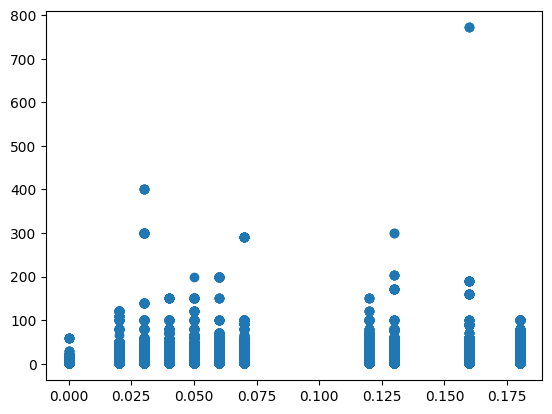

In [91]:
x = df["escala_sentiment"].values
y = df["precio_1"].values
plt.scatter(x, y)
plt.show()

In [92]:
df[['escala_sentiment', 'precio_1']].corr()

,escala_sentiment,precio_1
escala_sentiment,1.000000,0.068161
precio_1,0.068161,1.000000


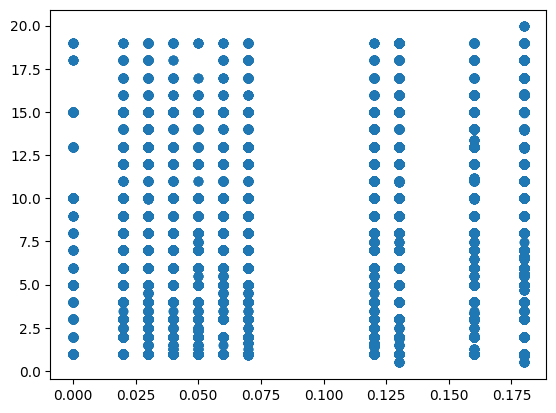

In [93]:
x = df[df["precio_1"] <= maximo]["escala_sentiment"].values
y = df[df["precio_1"] <= maximo]["precio_1"].values
plt.scatter(x, y)
plt.show()

In [94]:
df[df["precio_1"] <= maximo][['escala_sentiment', 'precio_1']].corr()

,escala_sentiment,precio_1
escala_sentiment,1.000000,0.177518
precio_1,0.177518,1.000000


CONCLUSIONES PREVIAS (SENTIMIENTO).

ESTA VARIABLE EXPLICA EXPONE AUN MENOS DISPERSION QUE LAS VARIABLES ANTERIORES CON RESPECTO AL PRECIO.

TAMBIEN SIGUE MANTENIENDO EL MISMO CRITERIO QUE CON LAS ANTERIORES PERO DE MANERA MENOS DISPERSA. EN LA MEDIDA QUE LOS VALORES DEL ATRIBUTO ES MAS COMUN (O MAS CONSUMIDO) EL PRECIO TIENDE A AUMENTAR, PERO A UNA TASA BAJA DE INCREMENTO.

EARLY VS PRECIO

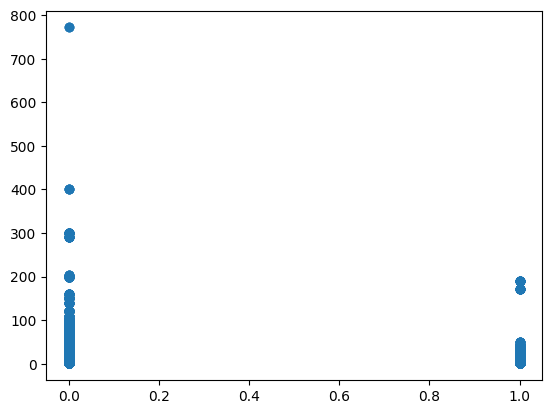

In [95]:
x = df["escala_early"].values
y = df["precio_1"].values
plt.scatter(x, y)
plt.show()

In [96]:
df[['escala_early', 'precio_1']].corr()

,escala_early,precio_1
escala_early,1.000000,0.029848
precio_1,0.029848,1.000000


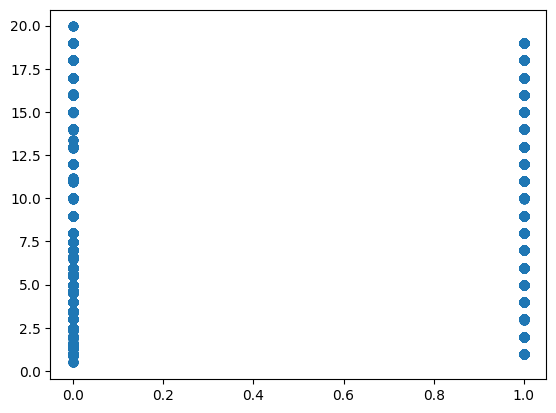

In [97]:
x = df[df["precio_1"] <= maximo]["escala_early"].values
y = df[df["precio_1"] <= maximo]["precio_1"].values
plt.scatter(x, y)
plt.show()

In [98]:
df[df["precio_1"] <= maximo][['escala_early', 'precio_1']].corr()

,escala_early,precio_1
escala_early,1.000000,0.171126
precio_1,0.171126,1.000000


CONCLUSIONES PREVIAS (early access).

LA CONCLUSION INHERENTE AL ATRIBUTO EARLY ACCESS Y EL PRECIO ES INTERESANTE Y CLARA. "LOS LANZAMIENTO TEMPRANO (TRUE) TIENDEN A ASOCIARSE CON EL MENOR PRECIO DEL JUEGO".

AÑO VS PRECIO

In [99]:
df_año = df[df["año"] != -1]
df_año["año"] = df_año["año"] - 1980
df_año["año"].unique()

C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_25588\3247396088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_año["año"] = df_año["año"] - 1980


array([38, 17, 18, 26, 37, 25, 23, 27, 22, 20, 15, 16, 14, 21, 13, 24, 28,
       29, 19, 12,  9, 30, 31, 32, 33, 34,  3,  4, 35, 36, 10,  8, 11,  7,
        6, 41, 39,  5], dtype=int64)

In [100]:
df_año.head()

,publisher,genres,specs,early_access,sentiment,año,precio_1,escala_genres,escala_specs,escala_sentiment,escala_early
0,Trickjump Games Ltd,Action,Single-player,False,Mixed,38,3.99,0.20,0.21,0.16,0
1,Trickjump Games Ltd,Action,Steam Achievements,False,Mixed,38,3.99,0.20,0.14,0.16,0
2,Trickjump Games Ltd,Adventure,Single-player,False,Mixed,38,3.99,0.12,0.21,0.16,0
3,Trickjump Games Ltd,Adventure,Steam Achievements,False,Mixed,38,3.99,0.12,0.14,0.16,0
4,Trickjump Games Ltd,Simulation,Single-player,False,Mixed,38,3.99,0.08,0.21,0.16,0


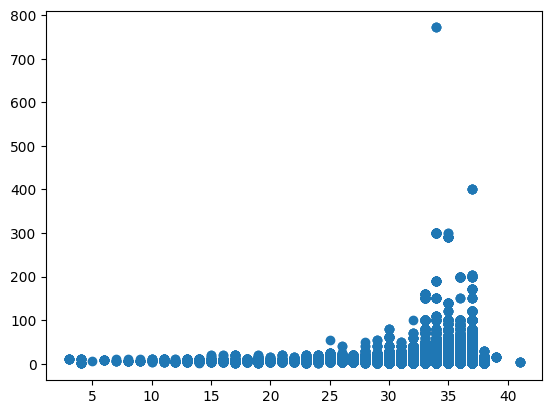

In [101]:
x = df_año["año"].values
y = df_año["precio_1"].values
plt.scatter(x, y)
plt.show()

In [102]:
df_año[['año', 'precio_1']].corr()

,año,precio_1
año,1.000000,0.018344
precio_1,0.018344,1.000000


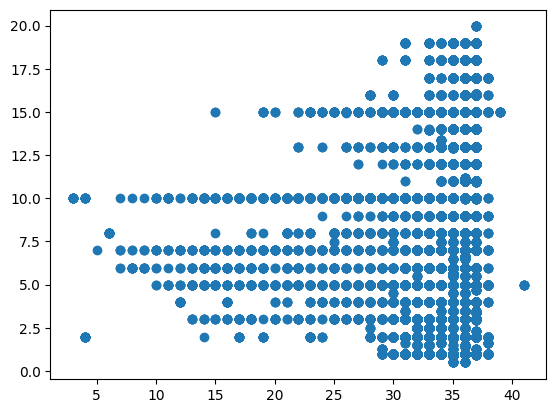

In [103]:
x = df_año[df_año["precio_1"] <= maximo]["año"].values
y = df_año[df_año["precio_1"] <= maximo]["precio_1"].values
plt.scatter(x, y)
plt.show()

In [104]:
df_año[df_año["precio_1"] <= maximo][['año', 'precio_1']].corr()

,año,precio_1
año,1.000000,-0.030243
precio_1,-0.030243,1.000000


A CONTINUACION LA MATRIZ DE CORRELACION.

In [105]:
df.describe()

,año,precio_1,escala_genres,escala_specs,escala_sentiment,escala_early
count,190768.000000,190768.000000,190768.000000,190768.000000,190768.000000,190768.000000
mean,2011.378790,10.553277,0.138365,0.099336,0.107300,0.100352
std,87.900202,13.440889,0.072929,0.069014,0.057337,0.300470
min,-1.000000,0.490000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,3.990000,0.080000,0.050000,0.050000,0.000000
50%,2016.000000,6.990000,0.120000,0.080000,0.120000,0.000000
75%,2017.000000,12.990000,0.200000,0.140000,0.160000,0.000000
max,2021.000000,771.710000,0.230000,0.210000,0.180000,1.000000


In [106]:
df_año.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190405 entries, 0 to 190767
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   publisher         172041 non-null  object 
 1   genres            190405 non-null  object 
 2   specs             190405 non-null  object 
 3   early_access      190405 non-null  bool   
 4   sentiment         190405 non-null  object 
 5   año               190405 non-null  int64  
 6   precio_1          190405 non-null  float64
 7   escala_genres     190405 non-null  float64
 8   escala_specs      190405 non-null  float64
 9   escala_sentiment  190405 non-null  float64
 10  escala_early      190405 non-null  int64  
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 16.2+ MB


In [107]:
correlation_matrix_efectiva = df_año[df_año["precio_1"] <= maximo][["escala_genres","escala_specs","escala_sentiment","escala_early","año","precio_1"]].corr()
correlation_matrix_año = df_año[["escala_genres","escala_specs","escala_sentiment","escala_early","año","precio_1"]].corr()

In [108]:

correlation_matrix_año #Sobre el dataframe con el rango outlier incluido pero filtrando los valores de año irregulares.

,escala_genres,escala_specs,escala_sentiment,escala_early,año,precio_1
escala_genres,1.000000,0.042554,0.054996,-0.094657,-0.016459,-0.161302
escala_specs,0.042554,1.000000,0.016948,-0.031946,-0.048738,-0.088407
escala_sentiment,0.054996,0.016948,1.000000,0.028837,-0.130485,0.067483
escala_early,-0.094657,-0.031946,0.028837,1.000000,0.128040,0.029228
año,-0.016459,-0.048738,-0.130485,0.128040,1.000000,0.018344
precio_1,-0.161302,-0.088407,0.067483,0.029228,0.018344,1.000000


In [109]:
correlation_matrix_efectiva #Sobre el dataframe con filtro sobre el año, pero solo considerando el rango de precio denominado "efectivo".

,escala_genres,escala_specs,escala_sentiment,escala_early,año,precio_1
escala_genres,1.000000,0.025143,0.048869,-0.108516,-0.009240,-0.063788
escala_specs,0.025143,1.000000,0.013591,-0.035635,-0.043017,-0.062657
escala_sentiment,0.048869,0.013591,1.000000,0.013089,-0.141262,0.176882
escala_early,-0.108516,-0.035635,0.013089,1.000000,0.128130,0.168980
año,-0.009240,-0.043017,-0.141262,0.128130,1.000000,-0.030243
precio_1,-0.063788,-0.062657,0.176882,0.168980,-0.030243,1.000000


CONCLUSIONES GENERALES.

AUN CUANDO SE PROCEDERA A IMPLEMENTAR EL MODELO DE REGRESION LINEAL (DADO QUE LOS DATOS SE AGRUPAN CON TENDENCIA) CIERTAMENTE, LA DISPERSION ES ALTA, ELLO REQUERIRA ALGUNOS AJUSTES ADICIONALES A LA INTERPRETACION.

EN RELACION A CUAL POBLACION DE DATOS ESTAREMOS UTILIZANDO, HAREMOS USO DE AMBAS, ES DECIR, LA ESTRATEGIA CONSISTIRA EN GENERAR UNA TENDENCIA "EFECTIVA" Y UNA TENDENCIA "GENERAL" PARA FINALMENTE Y EN FUNCION DE LA DISTRIBUCION DE PROBABILIDAD QUE ESTAREMOS GENERANDO ENTREGAR EL VALOR DE UNO U OTRO MODELO.

In [110]:
df_año[df_año["precio_1"] <= maximo][["escala_genres","escala_specs","escala_sentiment","escala_early","precio_1"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 162582 entries, 0 to 190767
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   escala_genres     162582 non-null  float64
 1   escala_specs      162582 non-null  float64
 2   escala_sentiment  162582 non-null  float64
 3   escala_early      162582 non-null  int64  
 4   precio_1          162582 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 7.4 MB


In [111]:
df_año[["escala_genres","escala_specs","escala_sentiment","escala_early","precio_1"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 190405 entries, 0 to 190767
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   escala_genres     190405 non-null  float64
 1   escala_specs      190405 non-null  float64
 2   escala_sentiment  190405 non-null  float64
 3   escala_early      190405 non-null  int64  
 4   precio_1          190405 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 8.7 MB


In [112]:
df_año[["escala_genres","escala_specs","escala_sentiment","escala_early","precio_1"]].to_csv("DatasetML_General.csv")
df_año[df_año["precio_1"] <= maximo][["escala_genres","escala_specs","escala_sentiment","escala_early","precio_1"]].to_csv("DatasetML_Efectivo.csv")